## Wine Quality EDA

We're gonna use the white variant of the [Wine Quality data set](https://archive.ics.uci.edu/ml/datasets/wine+quality), available on UCI Machine Learning Repository, and try to catch hold of as many insights of the data.

- *Exploratory Data Analysis* (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypothesis, and check assumptions with the help of summary statistics and graphical representations.

### **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*NOTE: inferences made are mentioned in the bullet points*

### **Loading data set**

In [ ]:
# Loading the data set
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **Data Insights**

In [ ]:
df.shape # Number of rows and columns

(4898, 12)

* Data set comprises of 12 characteristics and 4898 observations (4898 different wines)
* Quality is the dependent variable, and the rest are independent variables (physico-chemical characteristics)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* Data has only float and integer values

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* There are no null/missing values

### **Summary Statistics**

In [ ]:
df.describe() # various summary statistics: count, mean, standard deviation, min and max values, and quantiles

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* Mean value is more than the median (50th percentile/50%) value of each column
* There's a notably large difference between the 75th percentile and max values
of predictors "residual sugar", "free sulfur dioxide", "total sulfur dioxide"


Thus, these observations suggest that there are extreme values outliers in our data set

### **Understanding the Target Variable**

In [ ]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

* Target variable/Dependent variable "quality" is discrete and categorical in nature
* "quality" score ranges from 1 to 10
* 1, 2, and 10 quality ratings aren´t given by any observation; only scores from 3 to 9 are observed

In [ ]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### **Data Visualization**

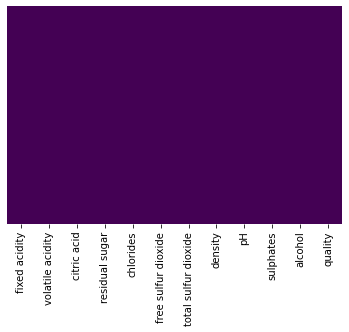

In [ ]:
# Checking missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis') 

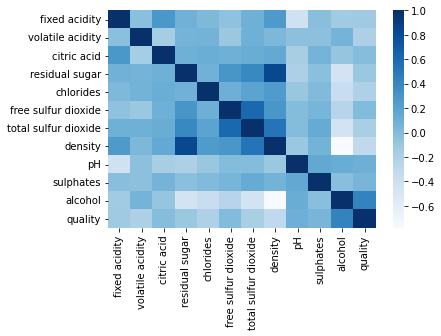

In [ ]:
# Checking correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='Blues', annot=False)
# Dark shades represent positive correlation, while lighter shades represent negative correlation

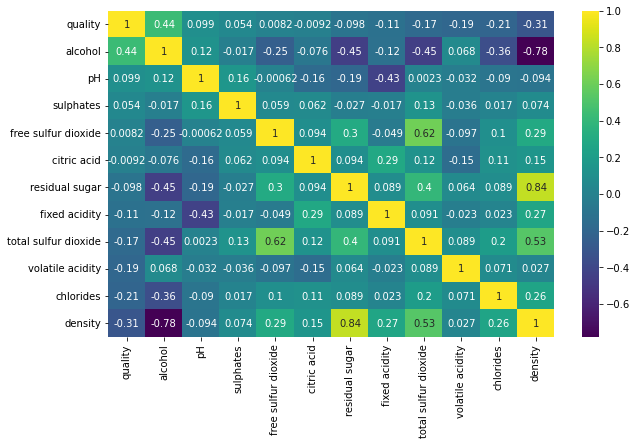

In [ ]:
# Quality correlation matrix
k = 12 # number of variables for the heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis')

* "free sulfur dioxide" and "citric acid" have almost no correlation with "quality". Since correlation is almost zero, we can infer that there's no linear relationship between these two predictors; it's safe to drop these features in case you're going to apply Linear Regression model to the data set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

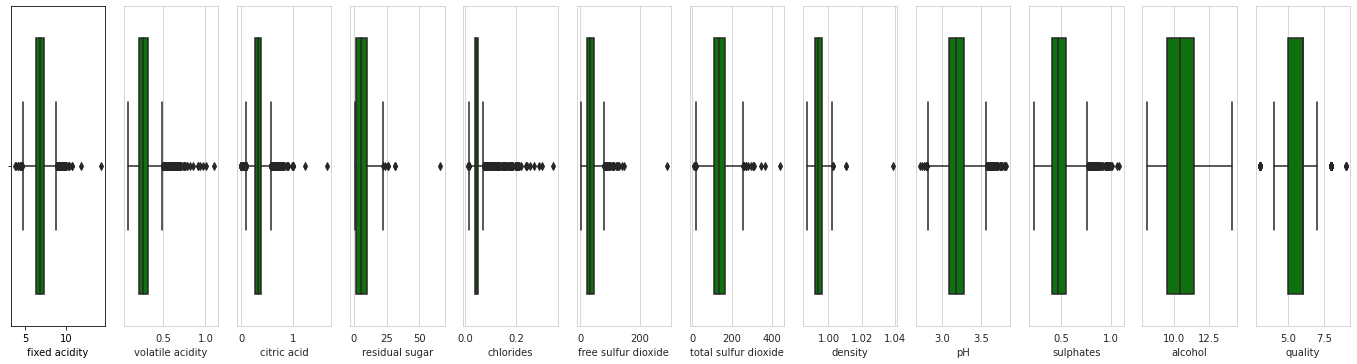

In [ ]:
# Checking outliers
l = df.columns.values
n_columns = 12
n_rows = len(l) - 1 / n_columns
plt.figure(figsize=(2*n_columns, 7*n_rows))
for i in range(0, len(l)):
  plt.subplot(n_rows + 1, n_columns, i+1)
  sns.set_style('whitegrid')
  sns.boxplot(df[l[i]], color='green', orient='h')

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables. The box shows the quartiles of the data set, while the whiskers extend to show the rest of the distribution.
* Minimum
* First quartile
* Median
* Third quartile
* Maximum

Outliers are either 1.5 X IQR or more above the third quartile or 1.5 X IQR or more below the first quartile. *(IQR = interquartile range)*



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

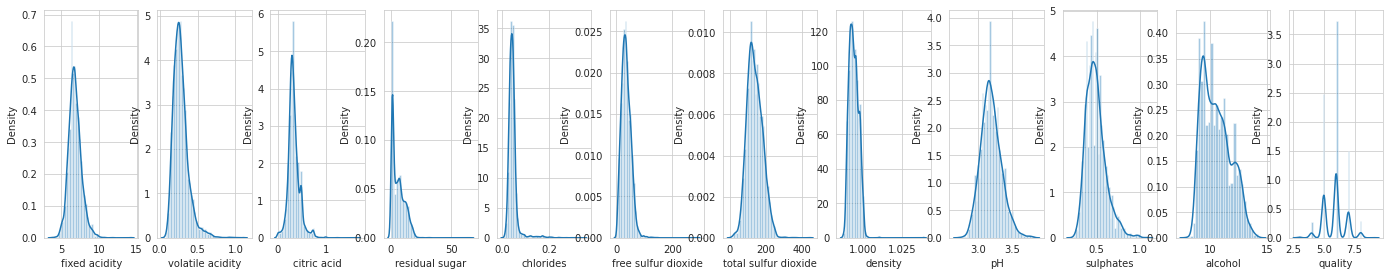

In [ ]:
# Checking discribution skewness
plt.figure(figsize=(2*n_columns, 5*n_rows))
for i in range(0, len(l)):
  plt.subplot(n_rows+1, n_cols, i+1)
  sns.distplot(df[l[i]], kde=True)

* "pH" column appears to be normally distributed
* The other variables are right/positively skewed